In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
fruits = pd.read_csv("fruit_data_with_colors.txt", sep = '\t')
fruits.head()

,fruit_label,fruit_name,fruit_subtype,mass,width,height,color_score
0,1,apple,granny_smith,192,8.4,7.3,0.55
1,1,apple,granny_smith,180,8.0,6.8,0.59
2,1,apple,granny_smith,176,7.4,7.2,0.60
3,2,mandarin,mandarin,86,6.2,4.7,0.80
4,2,mandarin,mandarin,84,6.0,4.6,0.79


In [6]:
from sklearn.model_selection import train_test_split

In [9]:
X = fruits[['height', 'width', 'mass', 'color_score']]
y = fruits['fruit_label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

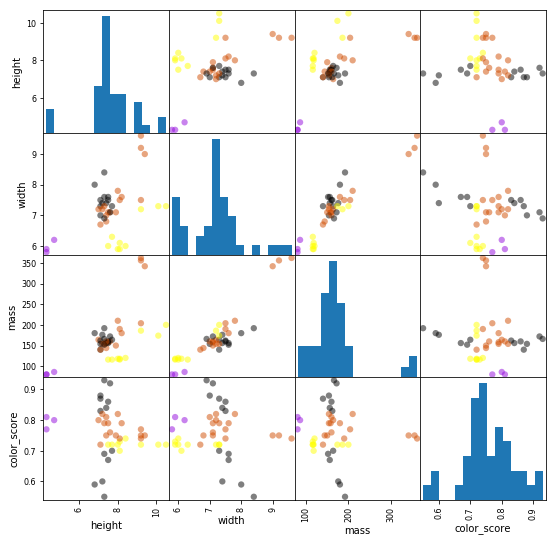

In [24]:
from matplotlib import cm
cmap = cm.get_cmap('gnuplot')
scatter = pd.plotting.scatter_matrix(X_train, c= y_train, marker = 'o', s=40, hist_kwds={'bins':15}, figsize=(9,9), cmap=cmap)

In [26]:
y_train.shape

(41,)

In [33]:
temp = pd.merge(X_train, pd.DataFrame(y_train), left_index=True, right_index= True)

In [35]:
temp.head()

,height,width,mass,color_score,fruit_label
21,7.4,7.4,156,0.84,1
0,7.3,8.4,192,0.55,1
36,7.6,7.1,160,0.76,3
25,9.2,9.2,356,0.75,3
30,7.5,7.1,158,0.79,3


In [39]:
temp1 = temp.drop(['fruit_label'], axis =1)
temp1.head()

,height,width,mass,color_score
21,7.4,7.4,156,0.84
0,7.3,8.4,192,0.55
36,7.6,7.1,160,0.76
25,9.2,9.2,356,0.75
30,7.5,7.1,158,0.79


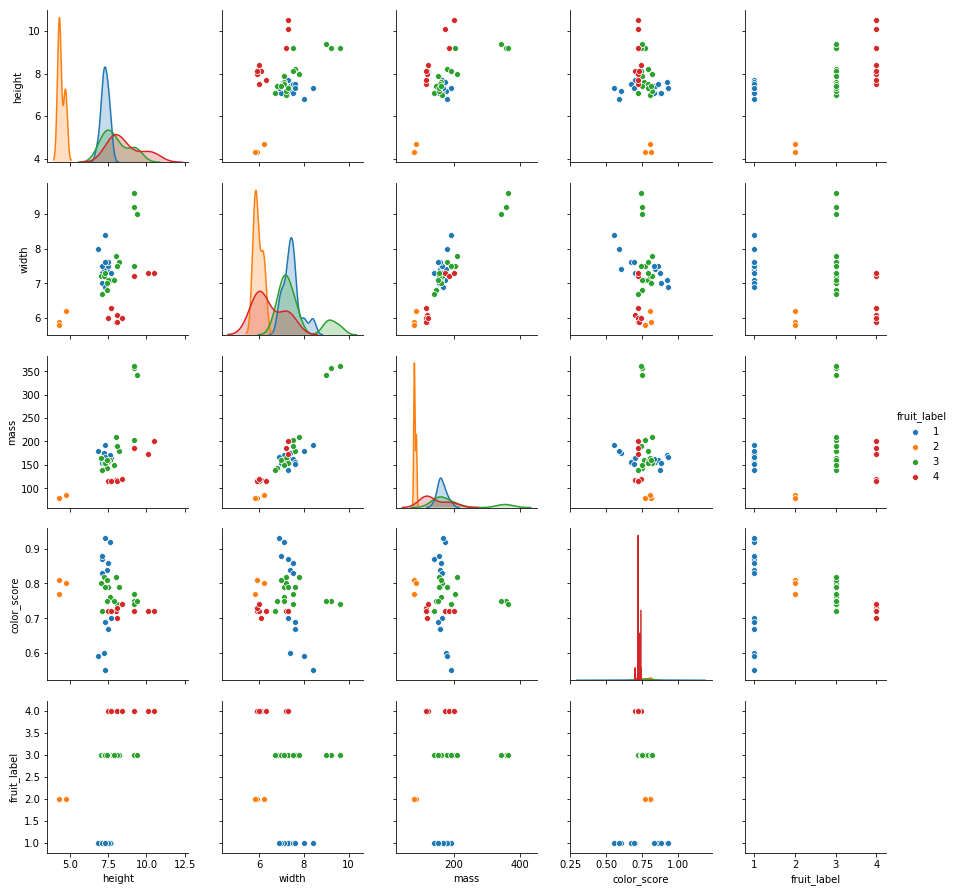

In [44]:
# import seaborn as sns
# sns.pairplot(data = temp, hue = 'fruit_label')

In [45]:
lookup_fruit_name = dict(zip(fruits.fruit_label.unique(), fruits.fruit_name.unique()))   
lookup_fruit_name

{1: 'apple', 2: 'mandarin', 3: 'orange', 4: 'lemon'}

In [46]:
from sklearn.neighbors import KNeighborsClassifier

In [47]:
knn = KNeighborsClassifier(n_neighbors=5)

In [48]:
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [49]:
knn.score(X_test, y_test)

0.6111111111111112

In [60]:
fruit_prediction = knn.predict([[100, 8.5, 8.7, 0.57]])
lookup_fruit_name[fruit_prediction[0]]

'mandarin'

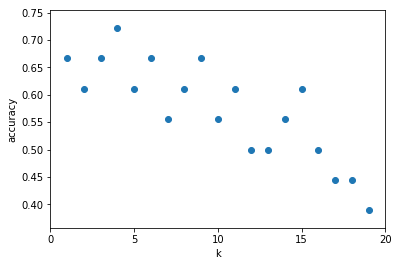

In [61]:
k_range = range(1,20)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))

plt.figure()
plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20]);

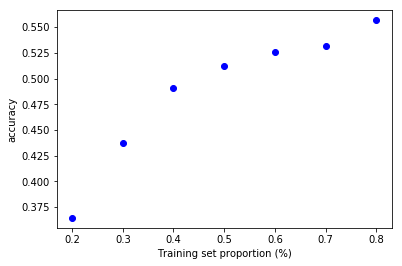

In [62]:
t = [0.8, 0.7, 0.6, 0.5, 0.4, 0.3, 0.2]

knn = KNeighborsClassifier(n_neighbors = 5)

plt.figure()

for s in t:

    scores = []
    for i in range(1,1000):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1-s)
        knn.fit(X_train, y_train)
        scores.append(knn.score(X_test, y_test))
    plt.plot(s, np.mean(scores), 'bo')

plt.xlabel('Training set proportion (%)')
plt.ylabel('accuracy');